In [1]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
imgs = ['IMG_0348', 'P_20221017_150542', 'P_20221017_161510']

In [3]:
name = imgs[0] #'P_20221017_161510'#P_20221017_161510
fold = 6
folder = 'test'    

In [4]:
folds_exp = {1: 'exp13', 6: 'exp14', 10: 'exp12'}

In [5]:
exp = folds_exp[fold]

In [6]:
path_in = '/home/ds/app/data/10_fold/'

In [7]:
os.listdir(path_in)

['fold_3',
 'fold_6',
 'fold_8',
 'fold_7',
 'fold_10',
 'fold_5',
 'fold_9',
 'fold_4',
 'fold_1',
 'dataset_formated.csv',
 'fold_2']

In [8]:
#os.listdir('/home/ds/app/data/10_fold/fold_1/test/images/')

In [9]:
impath = f'{path_in}fold_{fold}/{folder}/images/{name}.jpg'
lbpath = f'{path_in}fold_{fold}/{folder}/labels/{name}.txt'

In [10]:
impath

'/home/ds/app/data/10_fold/fold_6/test/images/IMG_0348.jpg'

In [11]:
img_src = cv2.imread(impath)
img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
img = img_src.copy()
img_pred =  img_src.copy()

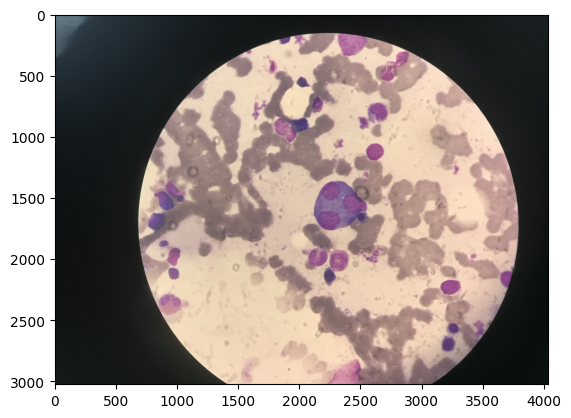

In [12]:
plt.imshow(img)
plt.show()

In [13]:
classes = {0: 'plasma cell', 1: 'other'}

In [14]:
dh, dw, _ = img.shape

fl = open(lbpath, 'r')
data = fl.readlines()
fl.close()

In [15]:
for dt in data:

    # Split string to float
    label, x, y, w, h = map(float, dt.split(' '))

    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1
        
    class_current = classes[label]
    print(f"{class_current}")
    
    x_min = int(l - (w / 2))
    y_min = int(t - (h / 2))

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 3)
    cv2.putText(img, class_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_COMPLEX, 3.0, [172 , 10, 127], 2)

plasma cell


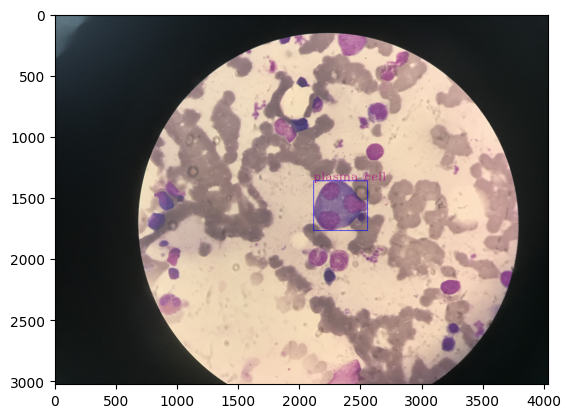

In [16]:
plt.imshow(img)
plt.show()

In [17]:
cv2.imwrite(f'test/{name}.png', img)

False

In [18]:
lbpath_pred = f'runs/test/fold_{fold}/labels/{name}.txt'

In [19]:
dh, dw, _ = img.shape

fl = open(lbpath_pred, 'r')
data = fl.readlines()
fl.close()

In [20]:
data

['0 0.579297 0.518229 0.1125 0.136458 0.948242\n']

In [21]:
for dt in data:

    # Split string to float
    label, x, y, w, h, _ = map(float, dt.split(' '))

    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1
        
    class_current = classes[label]
    print(f"{class_current}")
    
    x_min = int(l - (w / 2))
    y_min = int(t - (h / 2))

    cv2.rectangle(img_pred, (l, t), (r, b), (0, 0, 255), 4)
    cv2.putText(img_pred, class_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_COMPLEX, 3.0, [172 , 10, 127], 2)

plasma cell


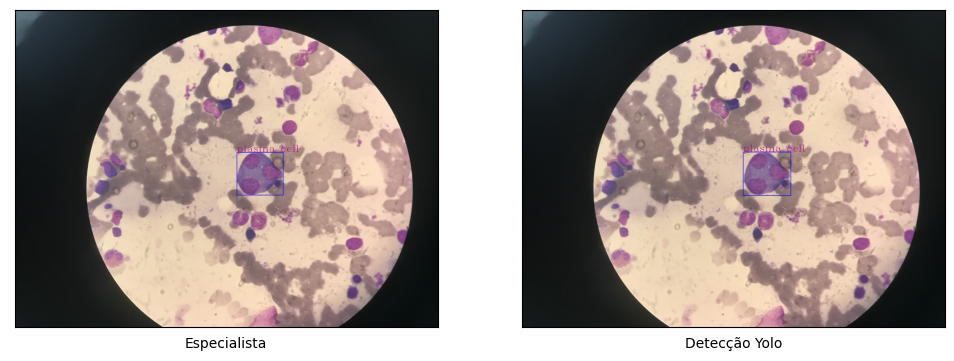

In [22]:
fig, axs = plt.subplots(1,2, figsize=(12,8))

axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel('Especialista')
axs[0].imshow(img)


axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlabel('Detecção Yolo')
axs[1].imshow(img_pred)

#plt.suptitle(f'{name}')
plt.savefig(f'test_paper/{name}_compare.png', dpi=300, bbox_inches='tight')
plt.show()

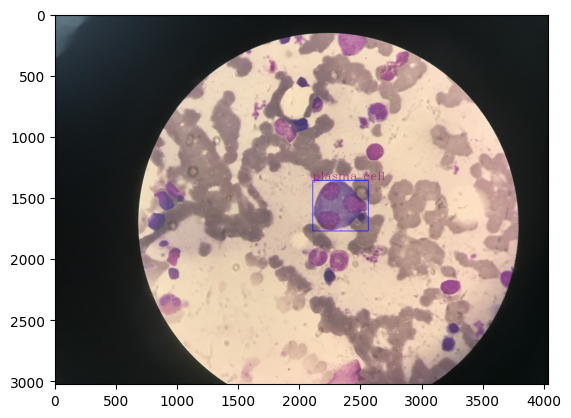

In [23]:
plt.imshow(img_pred)
plt.show()

In [24]:
cv2.imwrite(f'test_paper/{name}_pred.png', img_pred)

True